# Why We Use Graphs for Model Validation
Modified from: https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

## Anscombe’s Quartet
<p>There are many types of charts statisticians and data scientists use to describe models and assess their validity. In 1973, a well-known statistician named Francis Anscombe set out to prove the importance of graphing data. He created four datasets, now known as Anscombe’s Quartet (Figure 1 below), all with the same mean, standard deviation, and regression line. But are each qualitatively different.</p>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score 

data = pd.read_csv('./data/Anscombe.csv')
data.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47


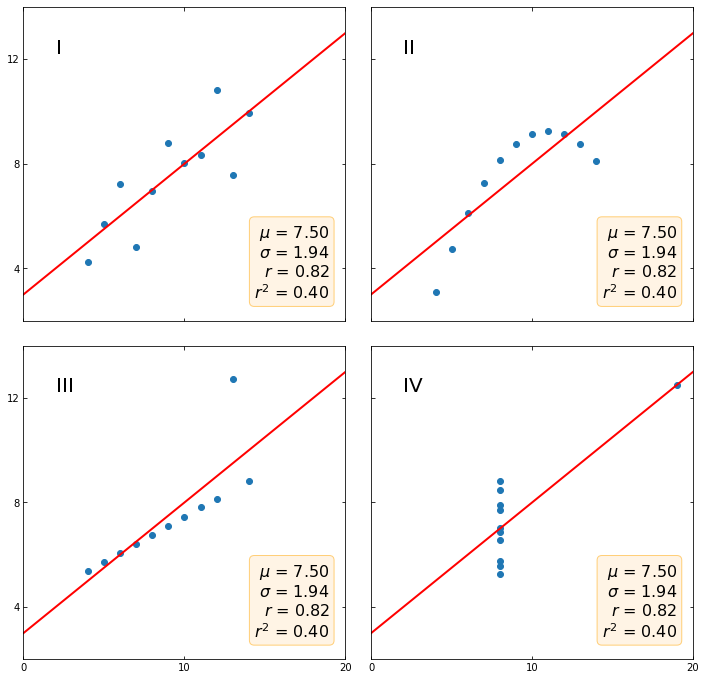

In [20]:
datasets = {
    'I': (data.X1, data.Y1),
    'II': (data.X2, data.Y2),
    'III': (data.X3, data.Y3),
    'IV': (data.X4, data.Y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}\n'
             f'$r^2$ = {r2_score(x, y):.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=16, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

<strong>Figure 1. Anscombe’s Quartet.</strong> Each dataset above shares the same mean, standard deviation, regression line, r, and r-squared value.

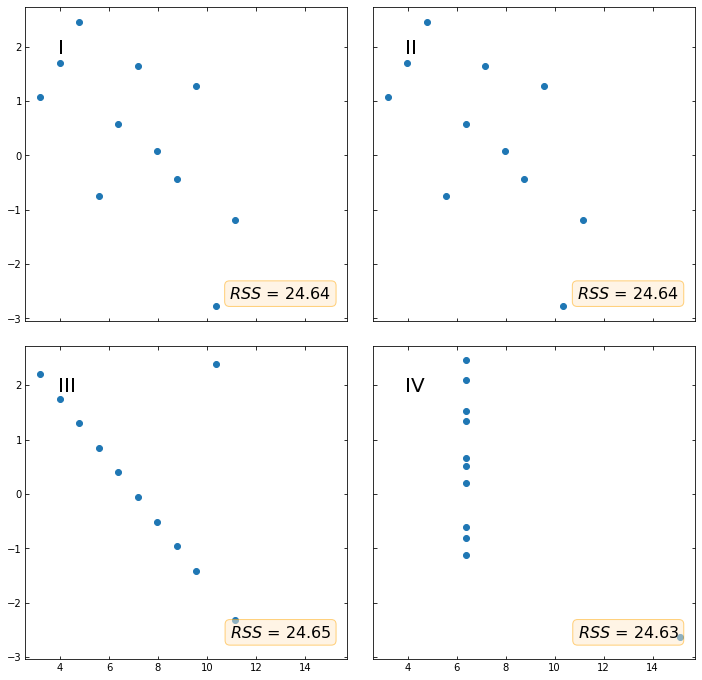

In [71]:
X1 = data.X1.values
y1 = data.Y1.values
X2 = data.X2.values
y2 = data.Y1.values
X3 = data.X3.values
y3 = data.Y3.values
X4 = data.X4.values
y4 = data.Y4.values

model1 = sm.OLS(y1, X1).fit()
model2 = sm.OLS(y2, X2).fit()
model3 = sm.OLS(y3, X3).fit()
model4 = sm.OLS(y4, X4).fit()

datasets = {
    'I': (model1.fittedvalues, model1.resid),
    'II': (model2.fittedvalues, model2.resid),
    'III': (model3.fittedvalues, model3.resid),
    'IV': (model4.fittedvalues, model4.resid)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # add text box for the statistics
    stats = (f'$RSS$ = {np.sum(np.power(y,2)):.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=16, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

<strong>Figure 2. Plots of Residuals (error terms) by Fitted Values for Anscombe’s Quartet.</strong> Each dataset above shares a nearly identical RSS value but the error terms for each are very different. Only the top two models display homoscedasticity with no discernable patterns.

If we were to only evaluate the regression line and its r-squared value of 0.40 for each of the models, it would appear all four models are identical as far as model accuracy. But only the first model is a valid linear model. The second model is curvilinear. The third model has a bad leverage point that skews the linear model. The fourth model has all but one observation where X is a constant. When we plot the residuals (error terms) by the predicted values for each model (Figure 2 above), the top two models appear identical but the bottom two are very different even though their RSS values are very close – 24.65 and 24.63. respectively.